# Principal Component Analysis (PCA)

In this lecture, we'll explore PCA, one of the most commonly used unsupervised machine learning methods. We'll cover the motivation behind PCA, its mathematical foundations, and a comprehensive practical application on a real-world dataset.



## Motivation

High-dimensional data is ubiquitous in many fields. However, high-dimensionality can lead to problems such as overfitting and difficulty in visualizing data. PCA helps by reducing the dimensionality of the dataset while retaining the most important information (i.e. the variance). 

**Key Applications of PCA:**
- **Data Visualization:** Reduce data to 2 or 3 dimensions to visualize clusters and structure.
- **Noise Reduction:** Eliminate redundant/noisy features.
- **Feature Extraction:** Create new and, most importantly, __uncorrelated__ variables (principal components) that represent the data.


## Mathematical Foundations of PCA

<figure>
    <img src="images/PCA.jpg" width="400" alt="PCA visualization">
    <figcaption>Source: Lavrenko and Sutton 2011</figcaption>
</figure>


PCA is an widely used technique in modern machine learning. The main steps usually include:

1. **Standardization:** Since PCA is affected by scale, we center and scale the data so each feature contributes equally.

2. **Covariance Matrix Computation:** This matrix captures the relationships between features. For data matrix \(X\), the covariance matrix is computed as:

$$
Cov(X) = \frac{1}{n-1} (X - \bar{X})^T (X - \bar{X})
$$


3. **Eigen Decomposition:** We compute the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors represent the directions (principal components) and the eigenvalues indicate the amount of variance captured by each component.

4. **Selection of Principal Components:** Components are ranked by eigenvalue. The top \(k\) components that capture the majority of the variance are selected.

5. **Projection:** The original data is projected onto these principal components, yielding a lower-dimensional representation.

Below, we go through each of these steps.

## 1. Understanding PCA with Synthetic Data

Let's begin by building an intuitive understanding of PCA using simple two-dimensional data.

We'll generate two correlated features and visualize them. Then, we'll identify the direction of maximum variance (the first principal component) and rotate the data into the new coordinate system what happen to the axes defining the data

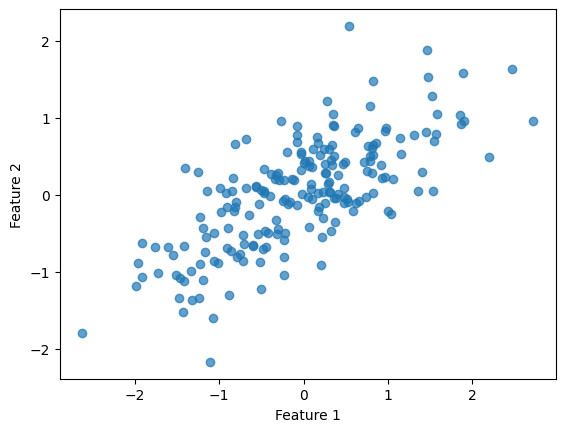

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Generate synthetic data with two correlated features
np.random.seed(42)
n = 200
x = np.random.randn(n) # random normal distribution
y = 0.5 * x + np.random.randn(n) * 0.5 # add gaussian noise

data = np.column_stack((x, y))

# Plot the synthetic data
plt.scatter(data[:,0], data[:,1], alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

We can fit a PCA model to the data and visualize the principal components. We can print the explained variance ratio, which tells us how much variance is captured by each component. We can also print the eigenvectors and eigenvalues of the covariance matrix.

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on the synthetic data
pca = PCA(n_components=2)
pca.fit(data)

print('Variances (eigenvalues): ', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)
print('Principal components (eigenvectors):\n', pca.components_)

# Extract the first principal component and the mean of the data
pc1 = pca.components_[0]
mean = np.mean(data, axis = 0)


print('Mean of data:', mean) # pc1 is explaining the data a lot 

Variances (eigenvalues):  [1.19578418 0.17493566]
Explained variance ratio: [0.87237679 0.12762321]
Principal components (eigenvectors):
 [[ 0.8232275   0.56771162]
 [-0.56771162  0.8232275 ]]
Mean of data: [-0.04077097  0.02254861]


We can then plot the data once again and highlight the first principal component

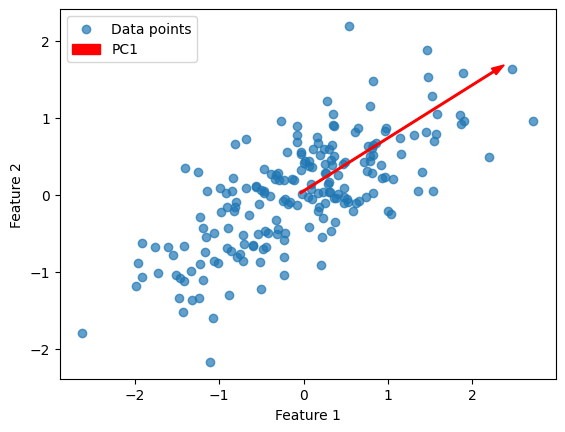

In [ ]:
# Plot the principal component direction on the original data
plt.scatter(data[:,0], data[:,1], alpha=0.7, label='Data points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


# Scale the PC vector for plotting
scale = 3 * np.std(data, axis=0).max()
plt.arrow(mean[0], mean[1], scale*pc1[0], scale*pc1[1], color='red', width=0.02, head_width=0.1, label='PC1')
plt.legend()
plt.show() # pc2 is orthogonal to pc1

Now let's rotate the data into the new coordinate system defined by the principal components.

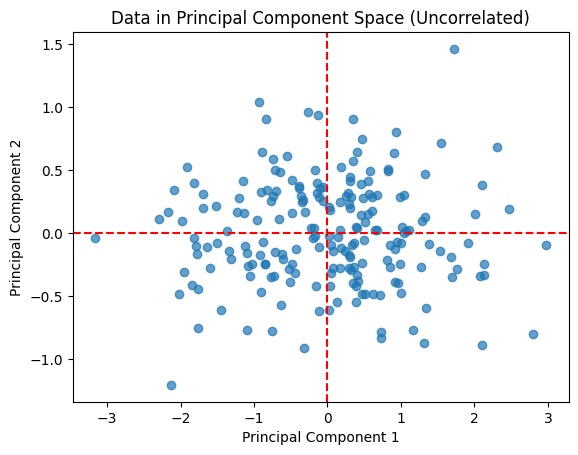

In [4]:
# Rotate the data into principal component space
data_pca = pca.transform(data)


# Plot the data in the PCA (rotated) space

plt.scatter(data_pca[:,0], data_pca[:,1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data in Principal Component Space (Uncorrelated)')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.show()


In this simple example, we generated two correlated features. We then computed the principal component direction, which captures the highest variance, and rotated the data into this new coordinate system. Notice that in the transformed space, the axes (PC1 and PC2) are uncorrelated, which is one of the key benefits of PCA.

## 3. PCA Example on the Digits Dataset

Now, let's apply PCA to a real-world dataset. We will use the `load_digits` dataset, which consists of 8x8 images of handwritten digits (64 features per image). In this section, we'll:

- Load and standardize the data.
- Compute the covariance matrix and perform eigen decomposition (via scikit-learn's PCA).
- Visualize the explained variance using a Scree Plot.
- Project the data to 2 dimensions and visualize the clusters corresponding to different digits.
- Visualize the principal components as images to see the dominant features.


Let's starting by loading the data as we've been doing in this course.

In [6]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

print('Original data shape:', X.shape)

Original data shape: (1797, 64)


Now let's standardize the data. We can use the `StandardScaler` from scikit-learn to do this.

In [7]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print('Mean after scaling (first 5 features):', np.mean(X_scaled, axis=0)[:5])
print('Std after scaling (first 5 features):', np.std(X_scaled, axis=0)[:5])

Mean after scaling (first 5 features): [ 0.00000000e+00 -2.56086502e-16 -2.34771702e-16 -3.05326777e-16
  1.39689163e-16]
Std after scaling (first 5 features): [0. 1. 1. 1. 1.]


Once the data is standardized, we can fit a PCA model to the data. We can then print the explained variance ratio and plot the Scree Plot to visualize the explained variance.

In [8]:
# Compute the covariance matrix and perform eigen decomposition manually (optional demonstration)
cov_matrix = np.cov(X_scaled.T)

print('Covariance matrix shape:', cov_matrix.shape)

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
idx = eigen_values.argsort()[::-1]
eigen_values = eigen_values[idx]
eigen_vectors = eigen_vectors[idx]

print('Top 5 Eigenvalues:', eigen_values[:5])

Covariance matrix shape: (64, 64)
Top 5 Eigenvalues: [7.34477606 5.83549054 5.15396118 3.96623597 2.9663452 ]


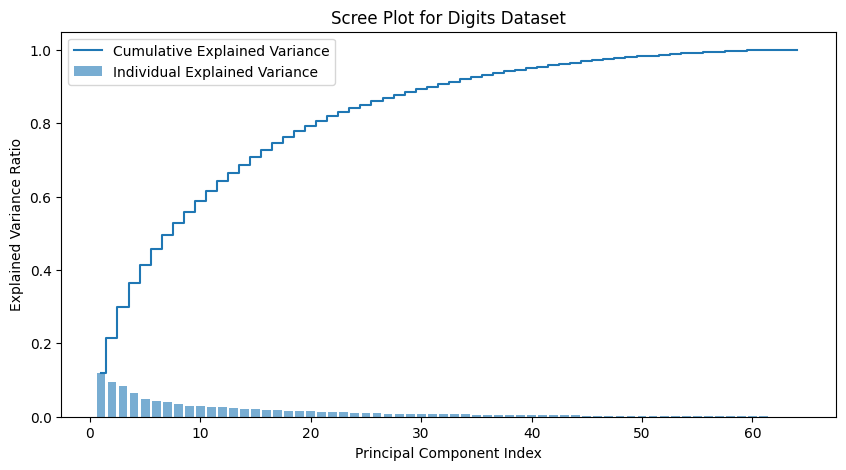

Cumulative variance for first 10 components: [0.12033916 0.21594971 0.30039385 0.36537793 0.41397948 0.45612068
 0.49554151 0.52943532 0.55941753 0.58873755]


In [10]:
# Use PCA from scikit-learn to generate the Scree Plot
pca_full = PCA(n_components=X_scaled.shape[1])
pca_full.fit(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10,5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Individual Explained Variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for Digits Dataset')
plt.legend(loc='best')
plt.show()

print('Cumulative variance for first 10 components:', cumulative_variance[:10])

Let's do the same, but this time we'll project the data to 2 dimensions and visualize the clusters corresponding to different digits.

Finally, we can visualize the principal components as images to see the dominant features.

In [11]:
# Apply PCA to reduce the digits data to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print('Shape of PCA-transformed data:', X_pca.shape)
print('Explained variance ratio (2 components):', pca.explained_variance_ratio_)
print('Total variance explained:', np.sum(pca.explained_variance_ratio_))

Shape of PCA-transformed data: (1797, 2)
Explained variance ratio (2 components): [0.12033916 0.09561054]
Total variance explained: 0.21594970500832789


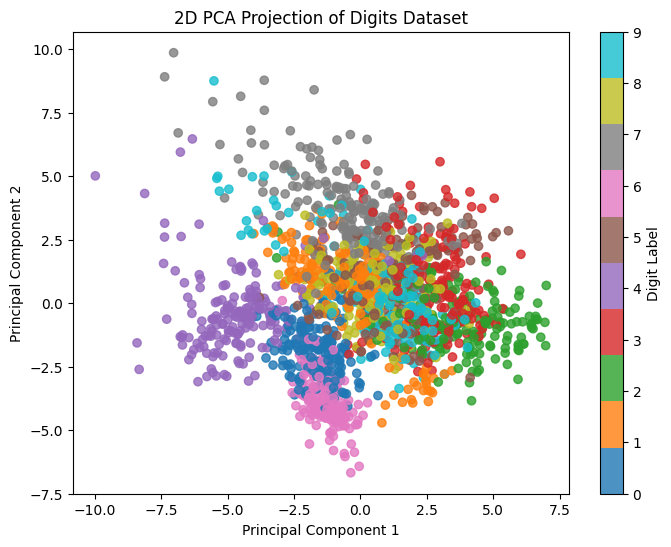

In [12]:
# Plot the 2D PCA projection of the digits dataset
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Digits Dataset')
plt.colorbar(scatter, label='Digit Label')
plt.show()

One really interesting thing we can do is to visualize the PCs as images. This can give us an idea of the dominant features that the PCs are capturing.

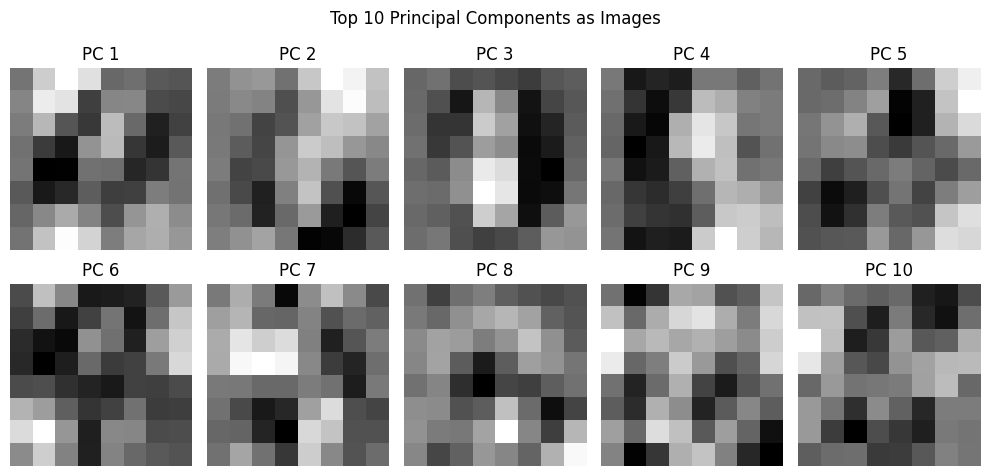

In [13]:
# Visualize the top 10 principal components as images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
components = pca_full.components_[:10]  

for i, ax in enumerate(axes.flat):
    ax.imshow(components[i].reshape(8,8), cmap='gray')
    ax.set_title(f'PC {i+1}')
    ax.axis('off')

plt.suptitle('Top 10 Principal Components as Images')
plt.tight_layout()
plt.show()

We can also visualize the data projected onto the first _n_ principal components. This can help us understand how the data is distributed in the lower-dimensional space.

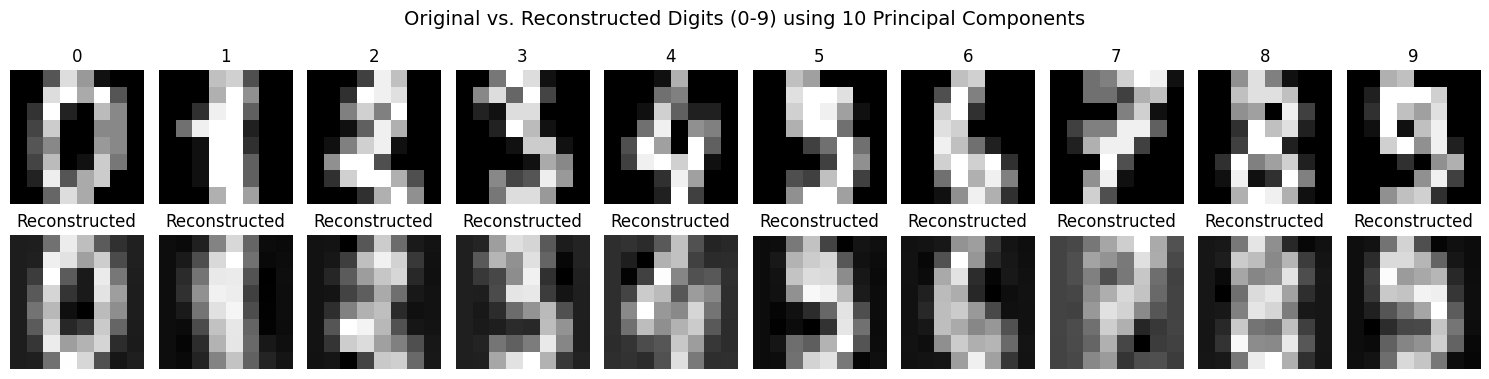

In [14]:
# Use 10 principal components
pca_10 = PCA(n_components=20)
X_pca_10 = pca_10.fit_transform(X_scaled)
X_reconstructed_scaled = pca_10.inverse_transform(X_pca_10)
X_reconstructed = scaler.inverse_transform(X_reconstructed_scaled)

# Create a grid: top row original, bottom row reconstructed for digits 0-9
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for digit in range(10):
    idx = np.where(y == digit)[0][0]
    axes[0, digit].imshow(X[idx].reshape(8,8), cmap='gray')
    axes[0, digit].set_title(f"{digit}")
    axes[0, digit].axis('off')
    
    axes[1, digit].imshow(X_reconstructed[idx].reshape(8,8), cmap='gray')
    axes[1, digit].set_title("Reconstructed")
    axes[1, digit].axis('off')
    
plt.suptitle("Original vs. Reconstructed Digits (0-9) using 10 Principal Components", fontsize=14)
plt.tight_layout()
plt.show()




Together, these examples demonstrate how PCA simplifies data, aids visualization, and provides insights into the underlying structure.